![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)

# Agulhas: Intercomparison of current products
 

***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center> Agulhas: Intercomparison of current products</center></h1>
<h4><center> The notebook aims to intercompare the current products available in the Agulhas region.</center> </h4> 
</div>

In [1]:
import sys
sys.path.append('..')
from src.mod_plot import *
from IPython.display import Video
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
output_dir = '../results' 

time_min = '2019-01-01'                                        # time min for analysis
time_max = '2019-12-31'                                        # time max for analysis


region = 'Agulhas'
lon_min = 14                                          # domain min longitude
lon_max = 35                                          # domain max longitude
lat_min = -45.                                          # domain min latitude
lat_max = -25.                                          # domain max latitude

box_lonlat = {'lon_min':lon_min,'lon_max':lon_max,'lat_min':lat_min,'lat_max':lat_max}

<div class="alert alert-info" role="alert">

<h2>1. Read current product data </h2>

</div>

In [3]:
list_of_maps =  '../data/maps/DUACS_Agulhas.nc' 
ds_maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps = ds_maps.sel(time=slice(time_min, time_max)) 
ds_maps = ds_maps.assign(uv=1/2*np.sqrt(ds_maps["ugos"]**2+ds_maps["vgos"]**2))
ds_maps.uv.attrs = ds_maps.vgos.attrs
ds_maps.uv.attrs['long_name'] = 'Absolute velocity magnitud'
ds_maps.uv.attrs['standard_name'] = 'surface_geostrophic_sea_water_velocity_magnitud'

list_of_maps =  '../data/maps/DC_WOC-ESA_Agulhas_2019_BFNQG/BFNQG_WOC_Ugeo_2019*' 
ds_maps1 = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps1 = ds_maps1.sel(time=slice(time_min, time_max))
ds_maps1 = ds_maps1.resample(time='1D').mean(dim='time')
ds_maps1 = ds_maps1.rename_vars({'ug':'ugos','vg':'vgos'}) 
ds_maps1 = ds_maps1.assign(uv=1/2*np.sqrt(ds_maps1["ugos"]**2+ds_maps1["vgos"]**2))
ds_maps1.uv.attrs = ds_maps1.vgos.attrs
ds_maps1.uv.attrs['long_name'] = 'Absolute velocity magnitud'
ds_maps1.uv.attrs['standard_name'] = 'surface_geostrophic_sea_water_velocity_magnitud'

<div class="alert alert-info" role="alert">

<h2>2. Create comparison movie </h2>

</div>

In [4]:
 
name_var = 'uv'
dir_output = '../results/'
methods = ['DUACS','BFN-QG']
ds_maps_list = (ds_maps,ds_maps1)


In [5]:
movie_intercomp(ds_maps_list, methods=methods, name_var=name_var, dir_output=dir_output,
                    region=region, framerate=24)

<div class="alert alert-info" role="alert">

<h2>3. Compare current product statistics </h2>

</div>

In [5]:


duacs_stat_uv_output_filename = f'{output_dir}/stat_uv_duacs_'+region+'.nc'   # output statistical analysis filename
duacs_psd_uv_output_filename = f'{output_dir}/psd_uv_duacs_'+region+'.nc'     # output spectral analysis filename

bfnqg_stat_uv_output_filename = f'{output_dir}/stat_uv_bfnqg_'+region+'.nc'  # output statistical analysis filename
bfnqg_psd_uv_output_filename = f'{output_dir}/psd_uv_bfnqg_'+region+'.nc'    # output spectral analysis filename

## Sea Surface height

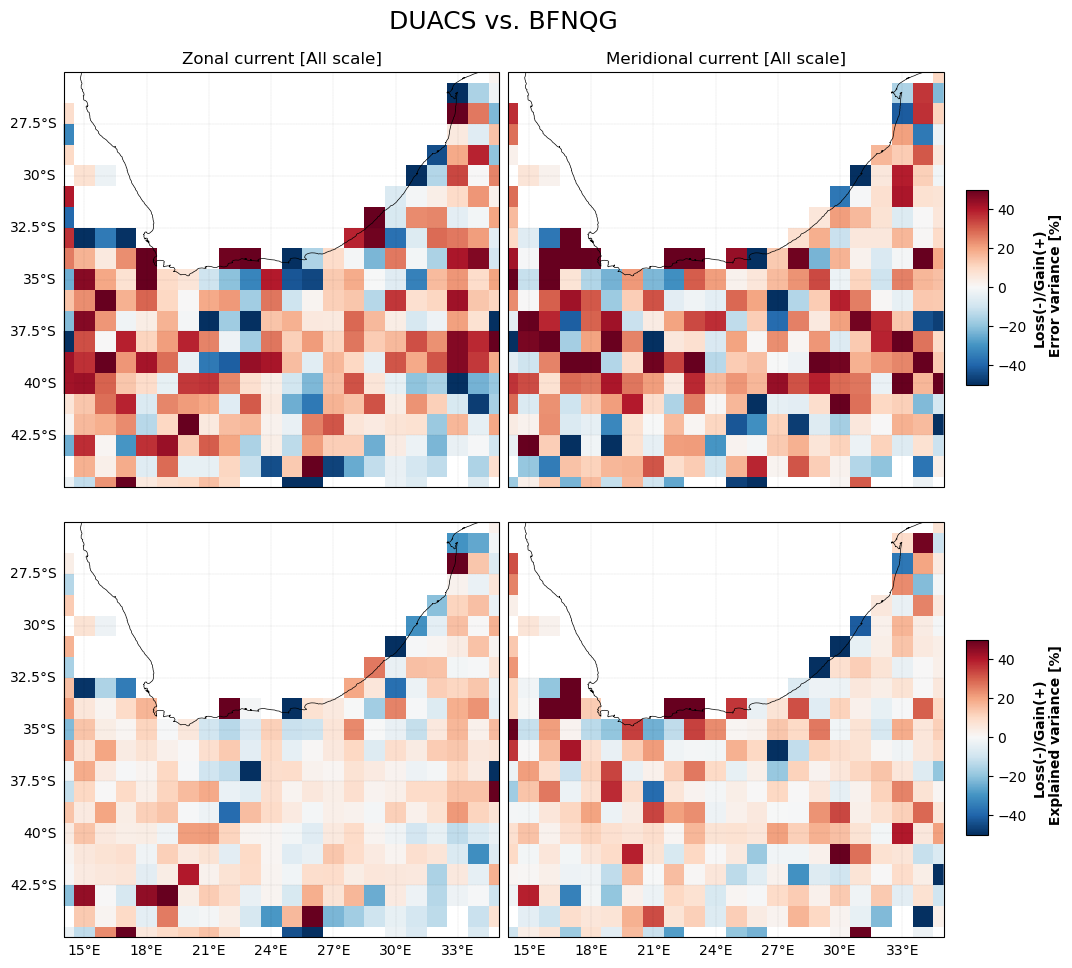

In [6]:
# Plot gridded stats 
compare_stat_score_map_uv_png(bfnqg_stat_uv_output_filename, duacs_stat_uv_output_filename, box_lonlat, ['DUACS','BFNQG'], region='Agulhas')

In [8]:
stopsam

NameError: name 'stopsam' is not defined

In [ ]:
#compare_psd_score(miost_geos_psd_filename, duacs_geos_psd_filename)
compare_psd_score_png(miost_geos_psd_filename, duacs_geos_psd_filename)

## Sea Surface Currents

In [ ]:
compare_stat_score_map_uv_png(miost_geos_stat_uv_output_filename, duacs_stat_uv_output_filename)

 <div class="alert alert-info" role="alert">

<h2>3. Experimental maps: MIOST (geostrophic + barotrop + equatorial waves modes) sea surface products vs DUACS</h2>

</div>

## Sea Surface height

In [ ]:
miost_geos_eqwaves_barotrop_stat_filename = f'{output_dir}/stat_sla_miost_geos_eqwaves_barotrop.nc'
miost_geos_eqwaves_barotrop_psd_filename = f'{output_dir}/psd_sla_miost_geos_eqwaves_barotrop.nc'

In [ ]:
miost_geos_eqwaves_barotrop_stat_uv_output_filename = f'{output_dir}/stat_uv_miost_geos_eqwaves_barotrop.nc'  # output statistical analysis filename
miost_geos_eqwaves_barotrop_psd_uv_output_filename = f'{output_dir}/psd_uv_miost_geos_eqwaves_barotrop.nc'    # output spectral analysis filename

In [ ]:
# Plot gridded stats
# Hvplot
# compare_stat_score_map(miost_geos_eqwaves_barotrop_stat_filename, duacs_geos_stat_filename)
# Matplotlib
compare_stat_score_map_png(miost_geos_eqwaves_barotrop_stat_filename, duacs_geos_stat_filename)

In [ ]:
compare_psd_score_png(miost_geos_eqwaves_barotrop_psd_filename, duacs_geos_psd_filename)

## Sea Surface Currents

In [ ]:
compare_stat_score_map_uv_png(miost_geos_eqwaves_barotrop_stat_uv_output_filename, duacs_stat_uv_output_filename)

<div class="alert alert-info" role="alert">

<h2>4. Experimental maps: MIOST (geostrophic + barotrop + equatorial waves modes) sea surface products vs MIOST (geostrophic mode only)</h2>

</div>

## Sea Surface height

In [ ]:
# Plot gridded stats
# Hvplot
# compare_stat_score_map(miost_geos_eqwaves_barotrop_stat_filename, miost_geos_stat_filename)
# Matplotlib
compare_stat_score_map_png(miost_geos_eqwaves_barotrop_stat_filename, miost_geos_stat_filename)

In [ ]:
compare_psd_score_png(miost_geos_eqwaves_barotrop_psd_filename, miost_geos_psd_filename)

## Sea Surface Currents

In [ ]:
compare_stat_score_map_uv_png(miost_geos_eqwaves_barotrop_stat_uv_output_filename, miost_geos_stat_uv_output_filename)